In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

In [2]:
# Load the FITS file containing individual single exposure spectra
fits_file = fits.open('n_K2-175_med-58150-kp2_04_201_sp15-087.fits')

#checking the data structure
fits_file.info()

Filename: n_K2-175_med-58150-kp2_04_201_sp15-087.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Information    1 PrimaryHDU      91   ()      
  1  COADD_B       1 BinTableHDU     37   1R x 6C   [3772E, 3772E, 3772E, 3772I, 3772I, 3772D]   
  2  COADD_R       1 BinTableHDU     37   1R x 6C   [3817E, 3817E, 3817E, 3817I, 3817I, 3817D]   
  3  B-83735683    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  4  B-83735696    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  5  B-83735710    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  6  R-83735683    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  7  R-83735696    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  8  R-83735710    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   


In [3]:
# Access the COADD_B extension
coadd_b_extension = fits_file['COADD_B']

# Display dimensions of each table inside COADD_B
for column_name in coadd_b_extension.columns.names:
    data_array = coadd_b_extension.data[column_name]
    dimensions = data_array.shape
    print(f"Dimensions of '{column_name}': {dimensions}")

Dimensions of 'FLUX': (1, 3772)
Dimensions of 'IVAR': (1, 3772)
Dimensions of 'WAVELENGTH': (1, 3772)
Dimensions of 'ANDMASK': (1, 3772)
Dimensions of 'ORMASK': (1, 3772)
Dimensions of 'NORMALIZATION': (1, 3772)


<IPython.core.display.Javascript object>


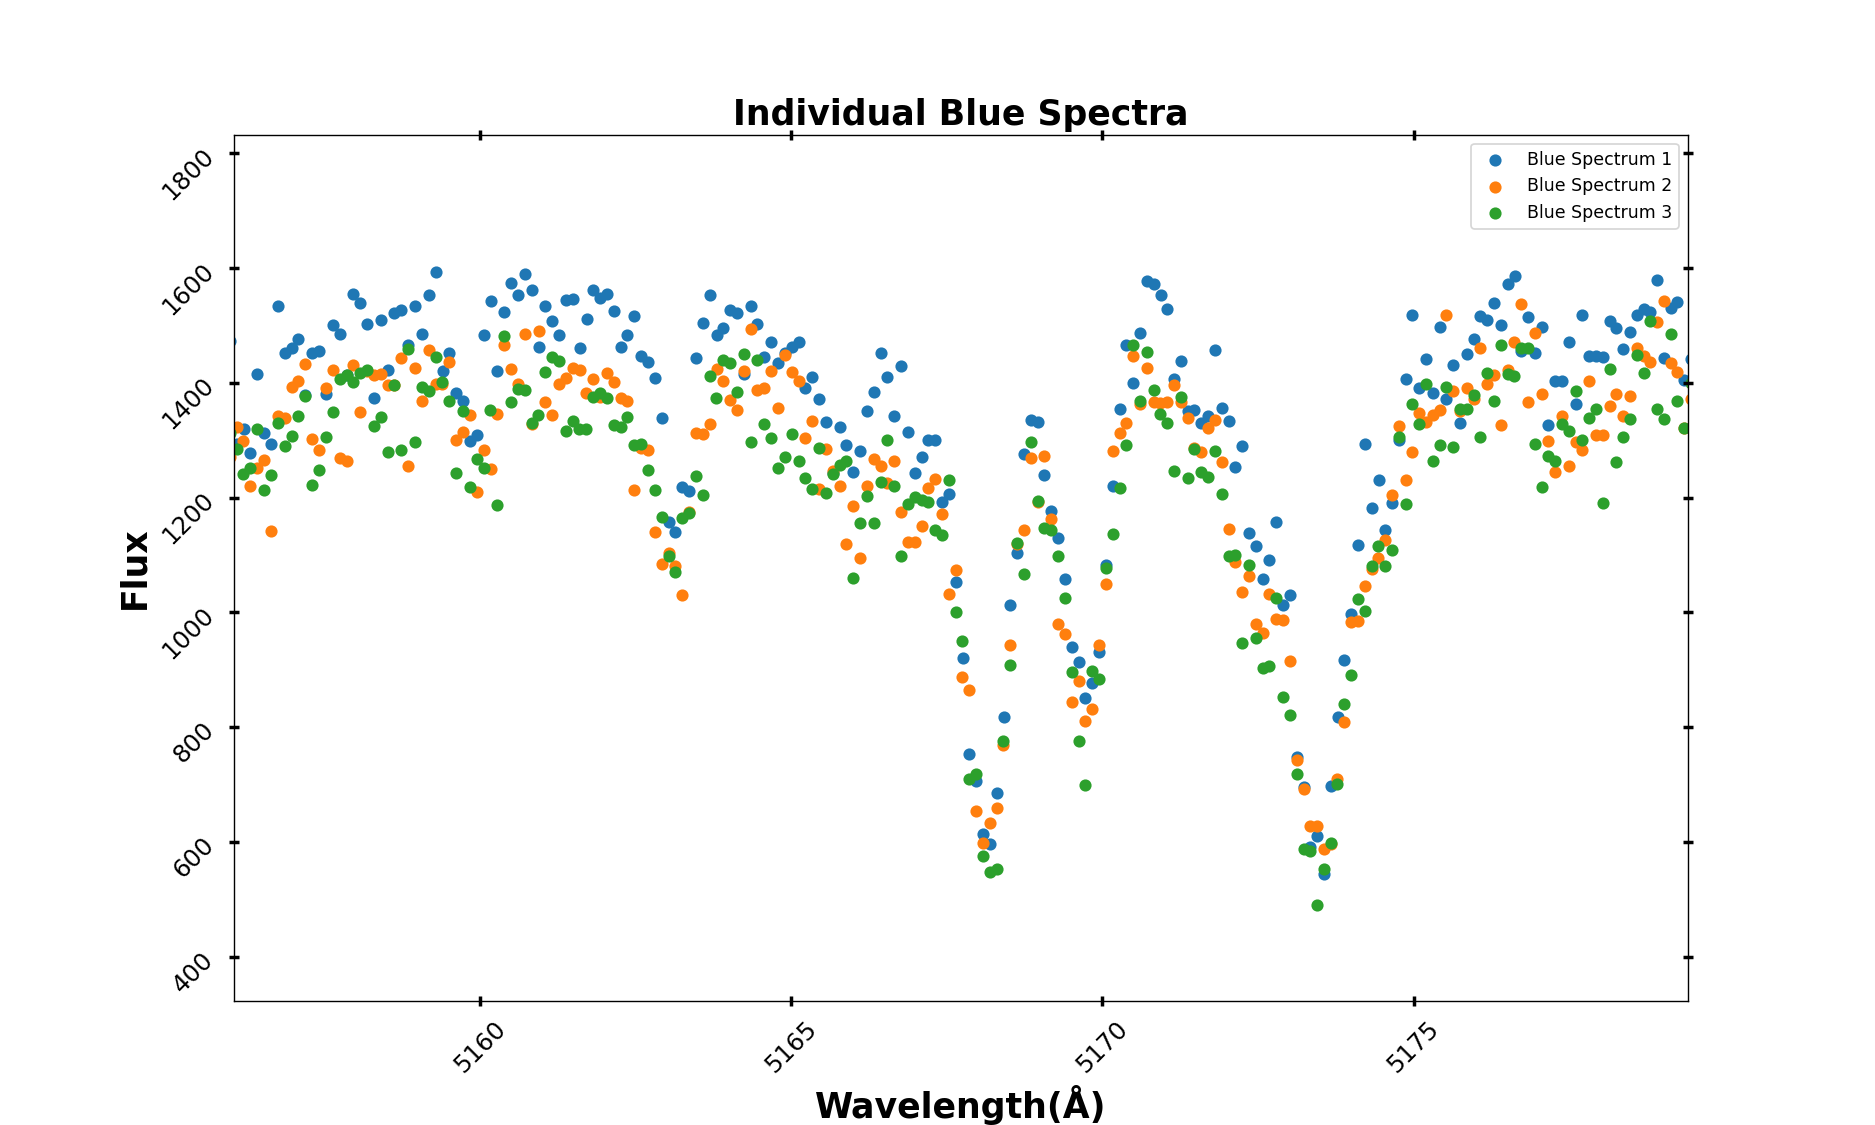

<IPython.core.display.Javascript object>


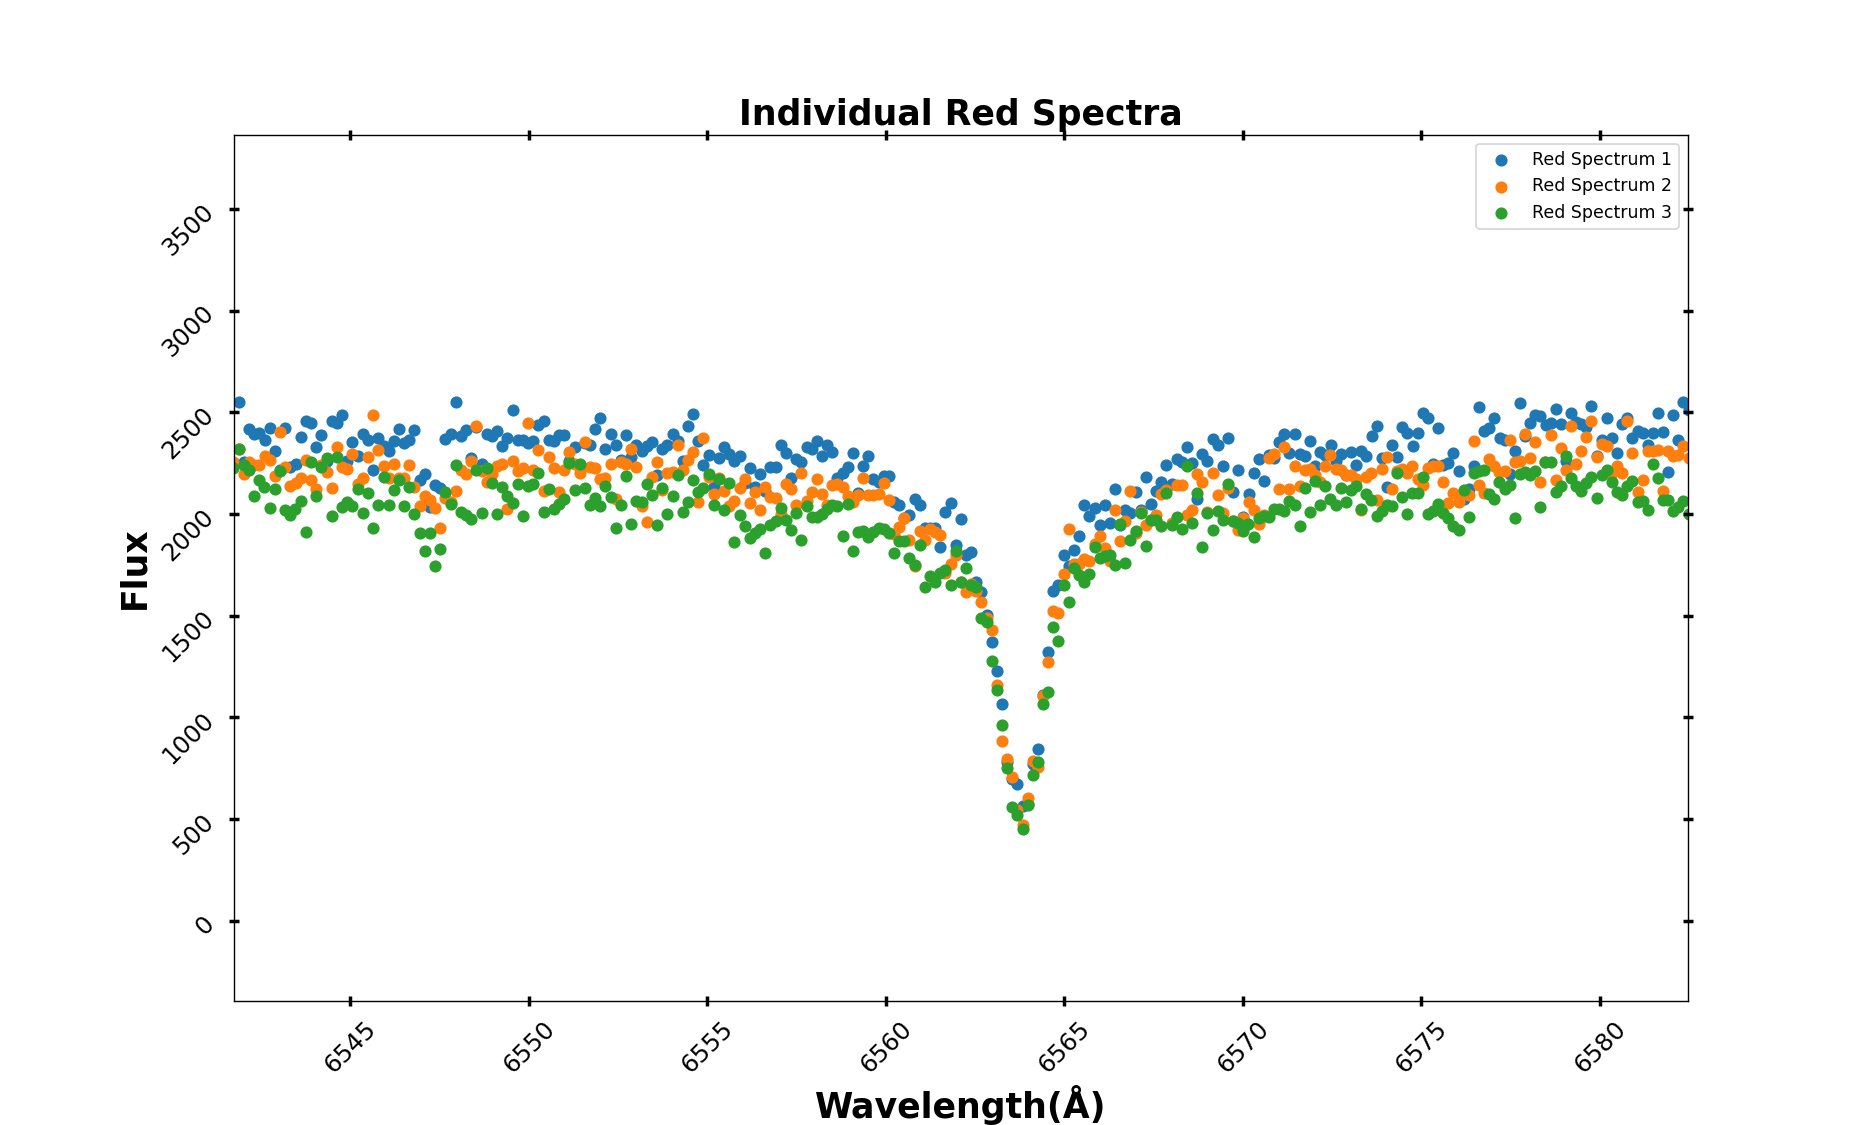

<IPython.core.display.Javascript object>


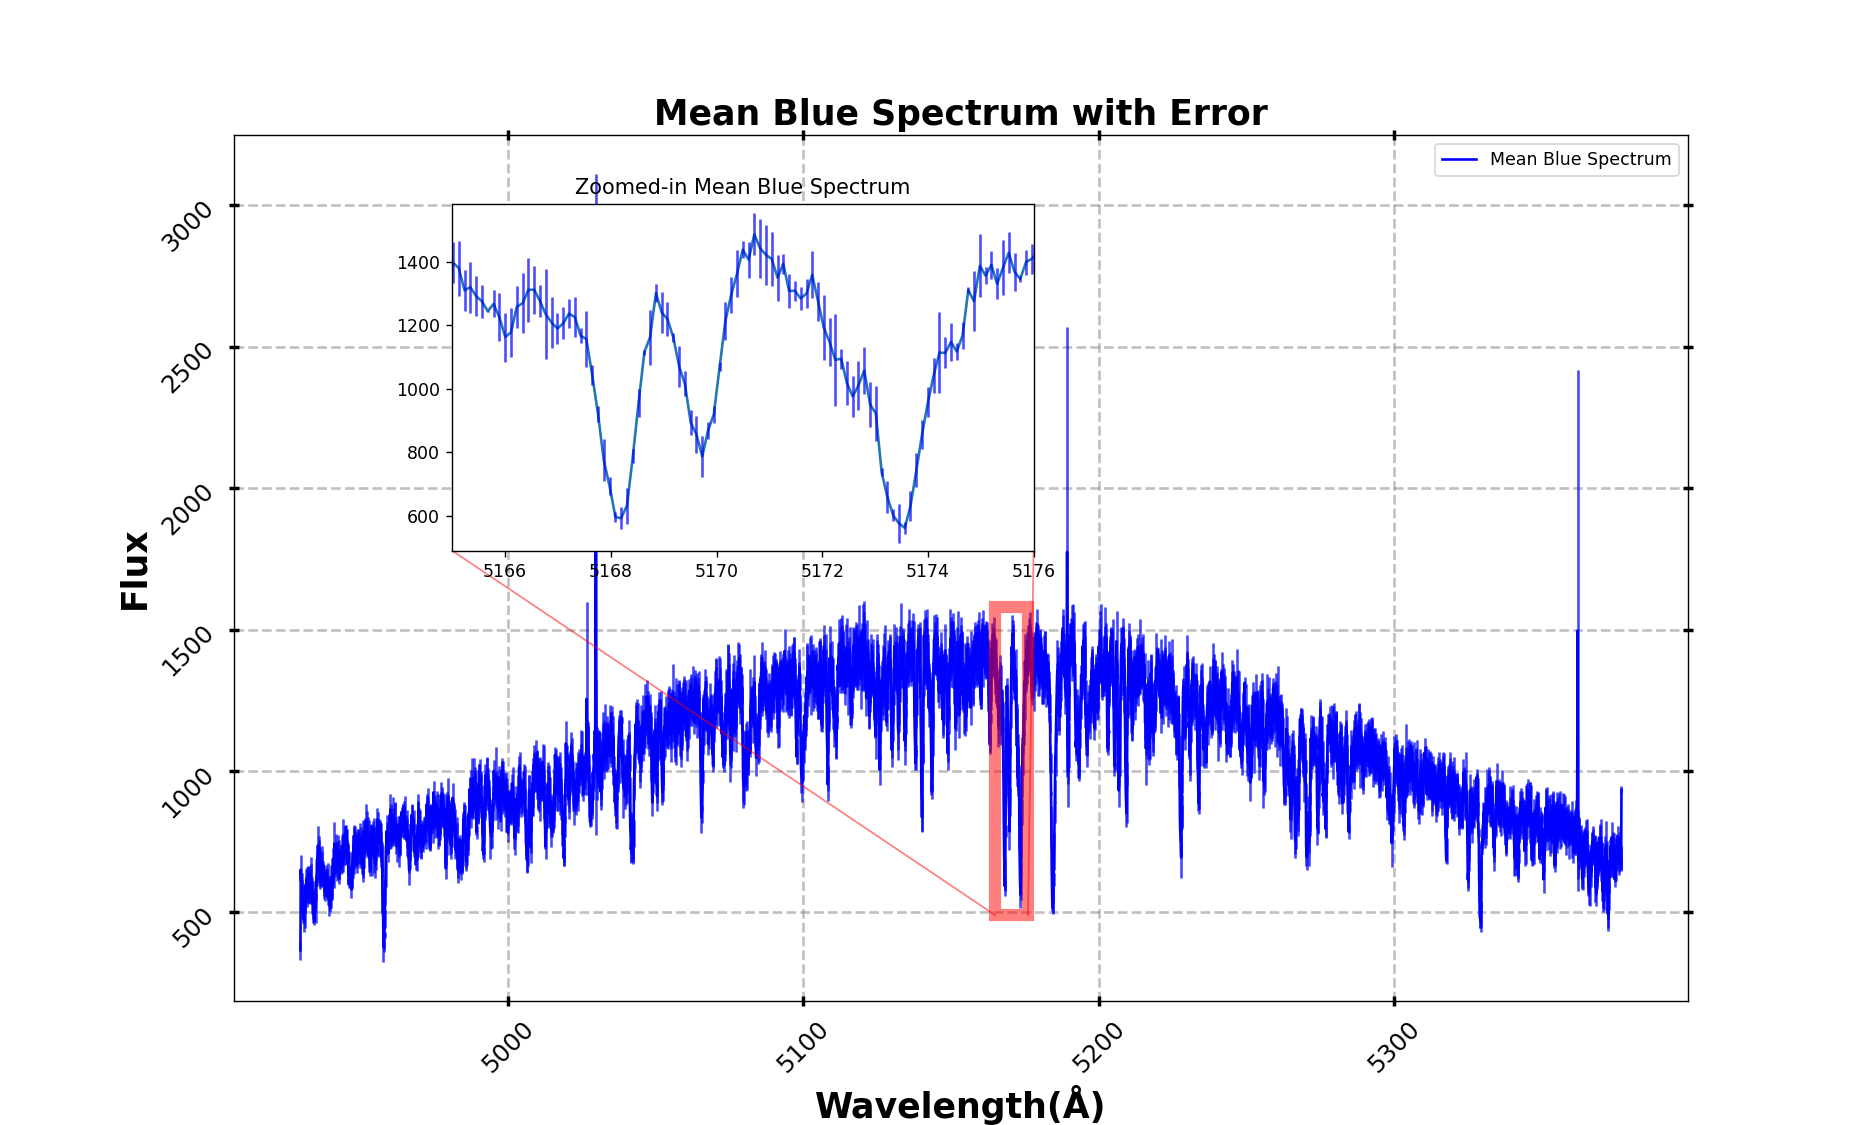

<IPython.core.display.Javascript object>


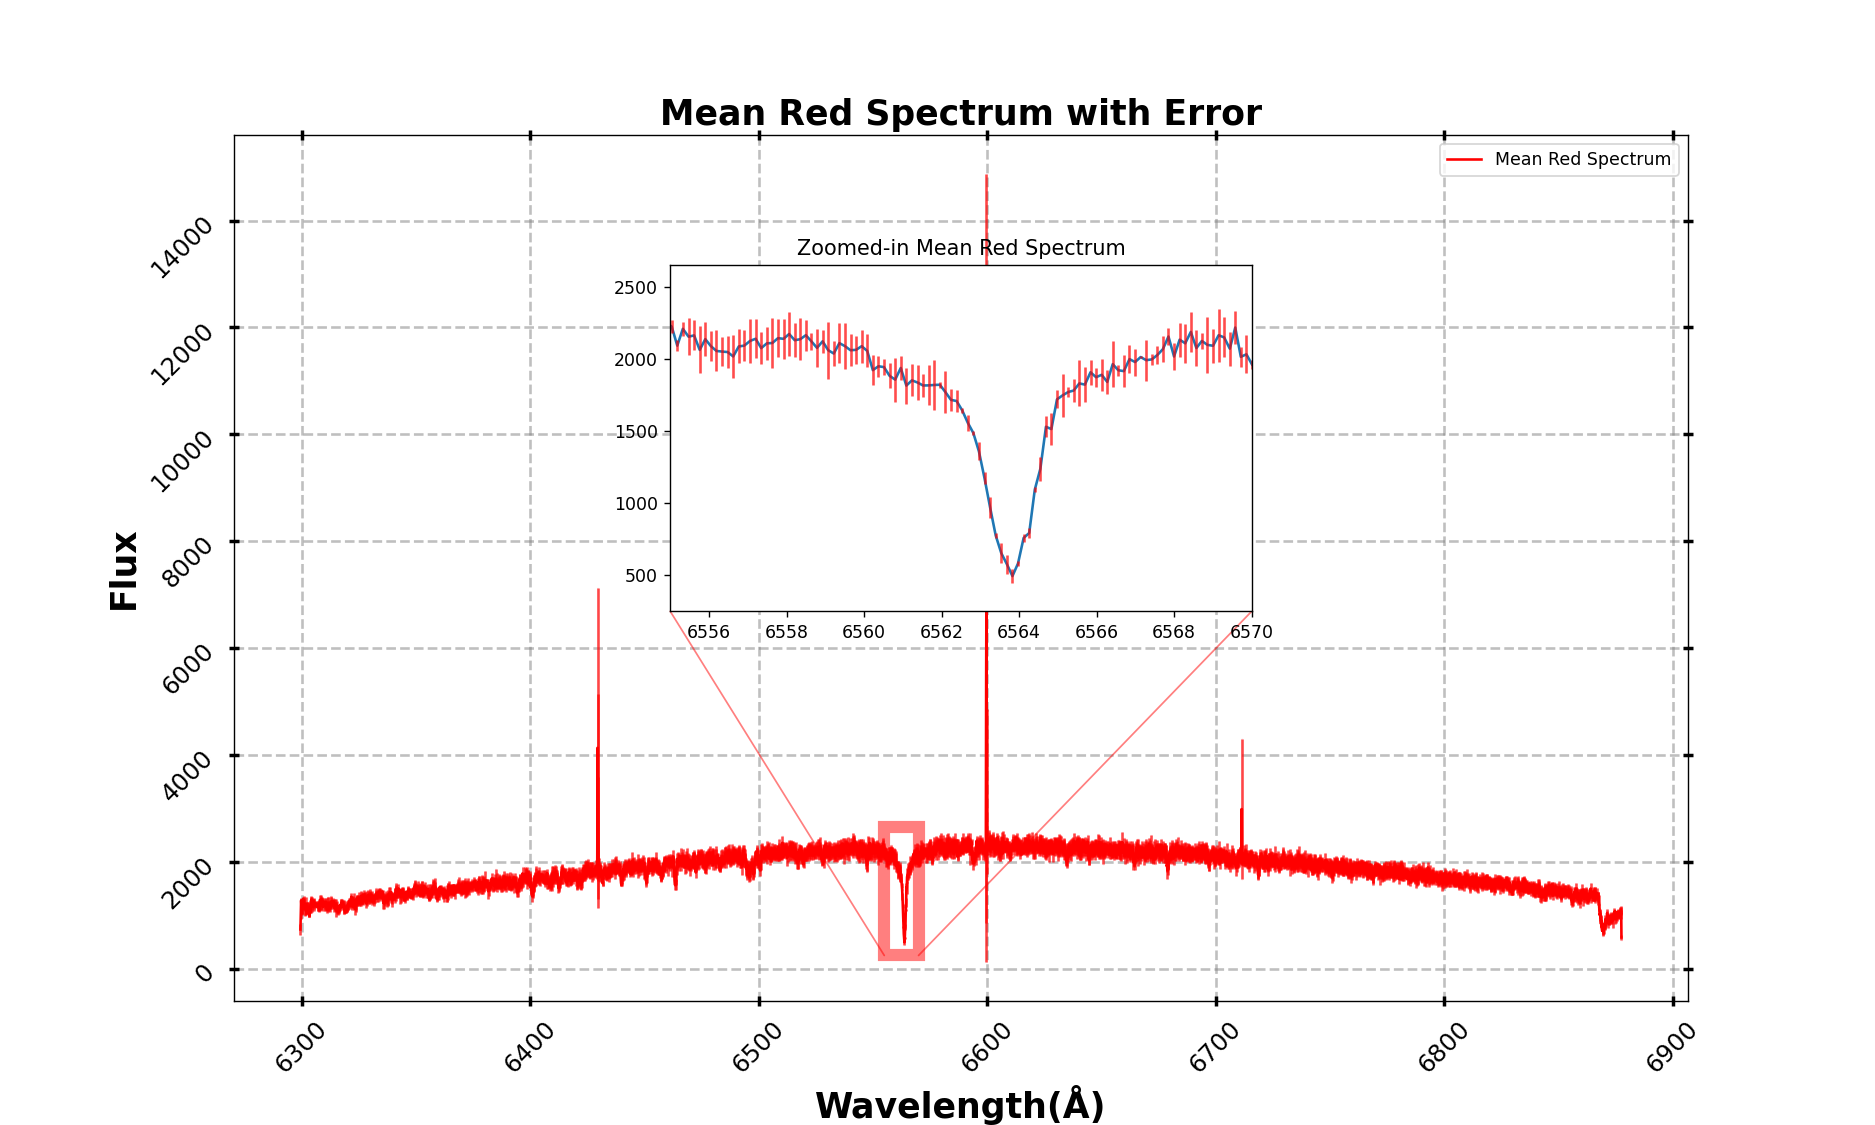

<IPython.core.display.Javascript object>


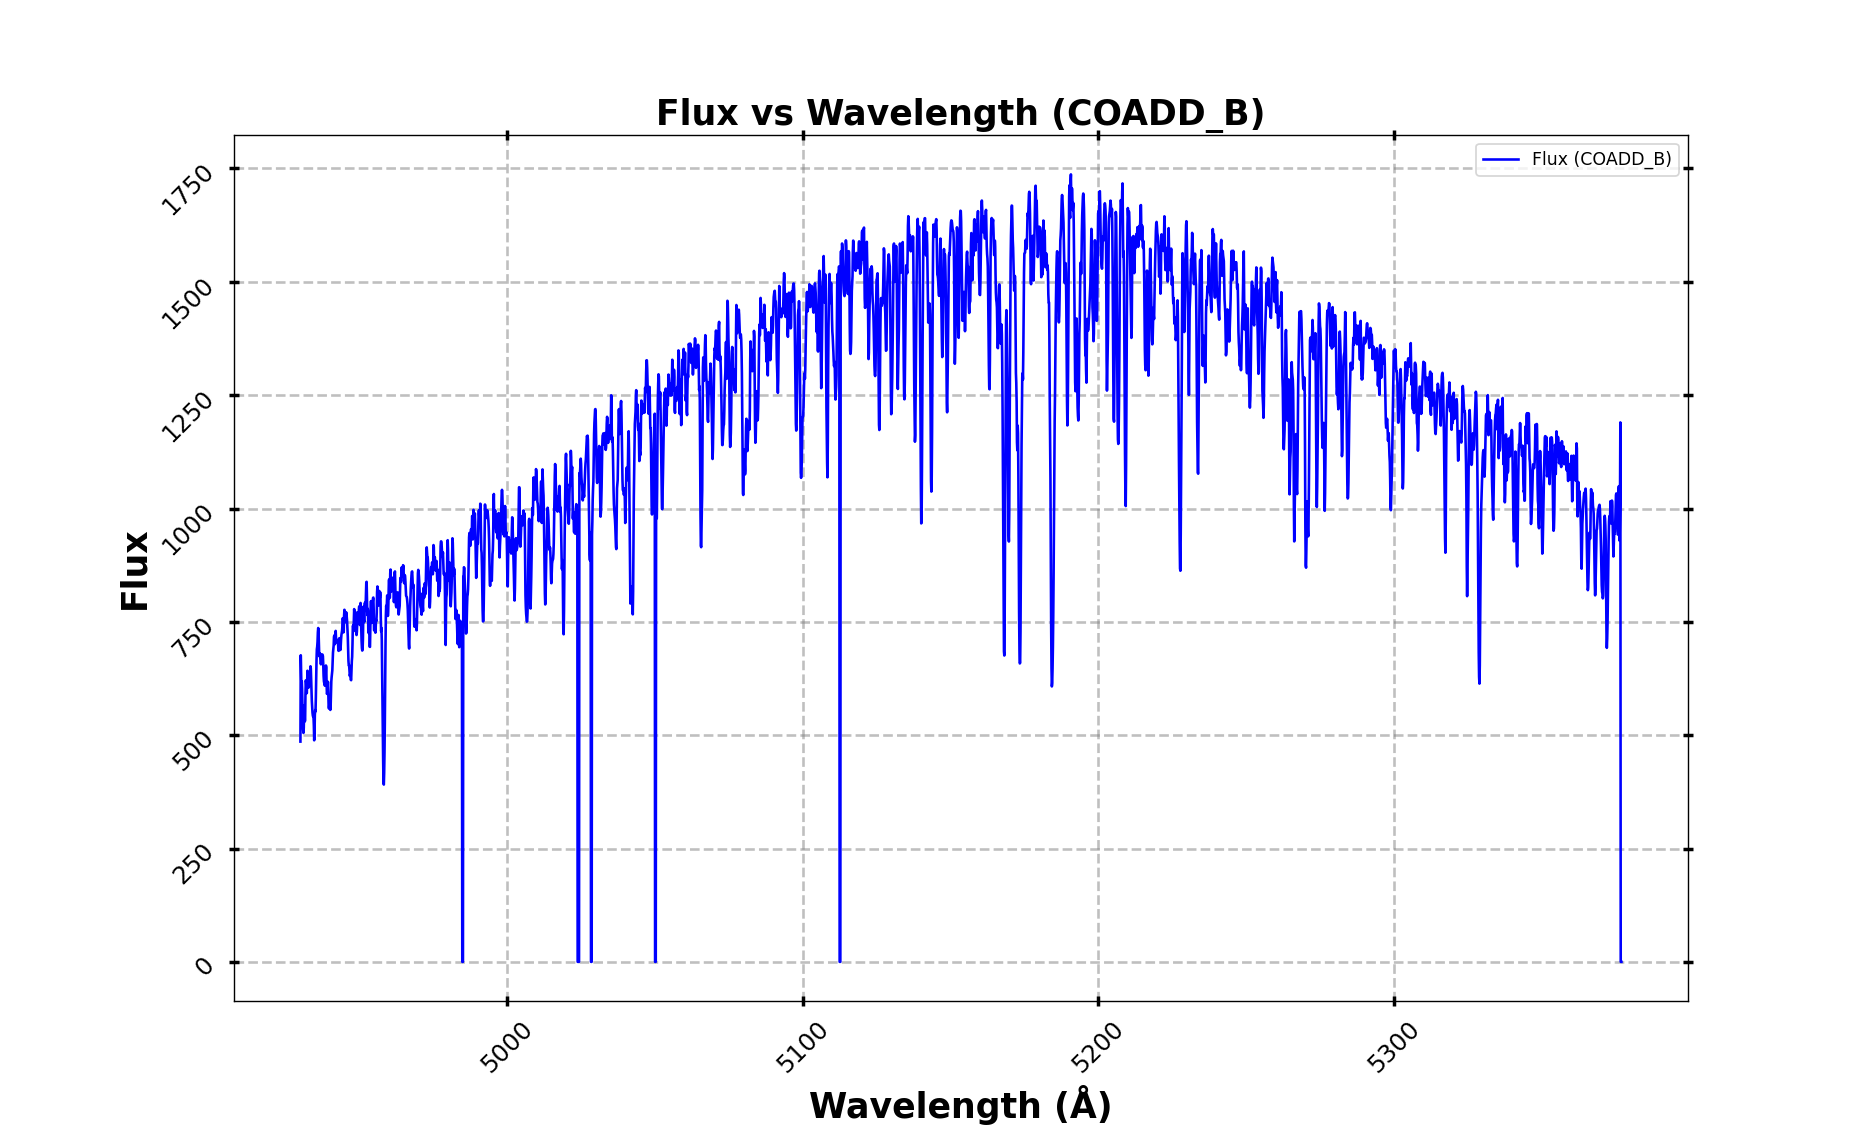

<IPython.core.display.Javascript object>


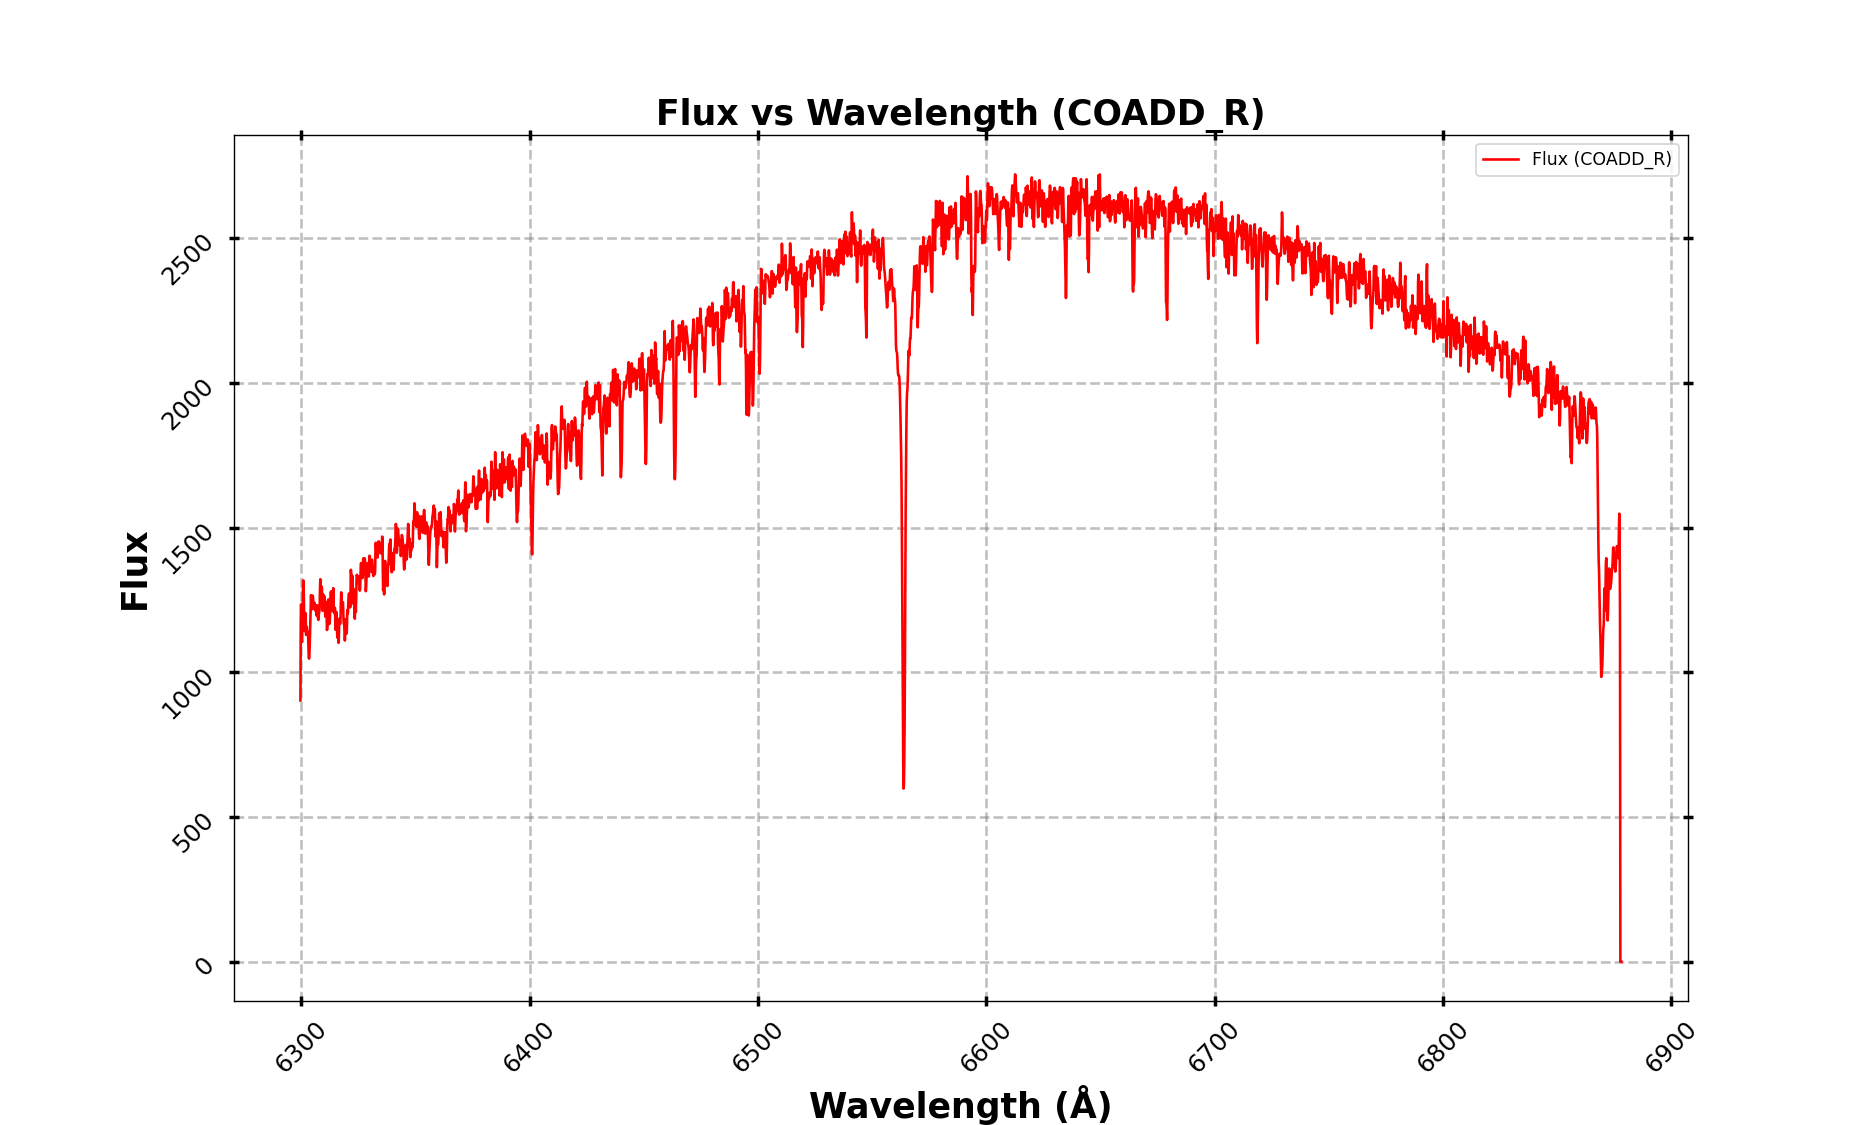

In [4]:

# Extracting data for individual blue spectra
blue_wavelengths = []
blue_fluxes = []
for extension_name in ['B-83735683', 'B-83735696', 'B-83735710']:
    blue_wavelengths.append(fits_file[extension_name].data['WAVELENGTH'])
    blue_fluxes.append(fits_file[extension_name].data['FLUX'])

# Extracting data for individual red spectra
red_wavelengths = []
red_fluxes = []
for extension_name in ['R-83735683', 'R-83735696', 'R-83735710']:
    red_wavelengths.append(fits_file[extension_name].data['WAVELENGTH'])
    red_fluxes.append(fits_file[extension_name].data['FLUX'])

# Calculate mean and standard deviation for blue spectra
mean_blue_flux = np.mean(blue_fluxes, axis=0)
std_blue_flux = np.std(blue_fluxes, axis=0)

# Calculate mean and standard deviation for red spectra
mean_red_flux = np.mean(red_fluxes, axis=0)
std_red_flux = np.std(red_fluxes, axis=0)

# Plot individual blue spectra
plt.figure(figsize=(15, 9))
for i in range(3):
    plt.scatter(blue_wavelengths[i], blue_fluxes[i], label=f'Blue Spectrum {i+1}')
plt.xlabel('Wavelength(Å)', fontweight='bold', fontsize=20)
plt.ylabel('Flux', fontweight='bold', fontsize=20)
plt.title('Individual Blue Spectra', fontweight='bold', fontsize=20)
plt.legend()
# Set tick labels to bold
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.show()

# Plot individual red spectra
plt.figure(figsize=(15, 9))
for i in range(3):
    plt.scatter(red_wavelengths[i], red_fluxes[i], label=f'Red Spectrum {i+1}')
plt.xlabel('Wavelength(Å)', fontweight='bold', fontsize=20)
plt.ylabel('Flux', fontweight='bold', fontsize=20)
plt.title('Individual Red Spectra', fontweight='bold', fontsize=20)
plt.legend()
# Set tick labels to bold
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.show()

# Plot mean blue spectrum with error
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(blue_wavelengths[0][0], mean_blue_flux[0], label='Mean Blue Spectrum', color='blue')
ax.fill_between(blue_wavelengths[0][0], mean_blue_flux[0] - std_blue_flux[0], mean_blue_flux[0] + std_blue_flux[0], alpha=0.3, color='lightblue')
ax.errorbar(blue_wavelengths[0][0], mean_blue_flux[0], yerr=std_blue_flux[0], fmt='none', color='blue', alpha=0.7)
ax.set_xlabel('Wavelength(Å)', fontweight='bold', fontsize=20)
ax.set_ylabel('Flux', fontweight='bold', fontsize=20)
ax.set_title('Mean Blue Spectrum with Error', fontweight='bold', fontsize=20)
ax.legend()

# Create inset manually for zoomed-in part
ax_inset = ax.inset_axes([0.15, 0.52, 0.4, 0.4])
ax_inset.plot(blue_wavelengths[0][0], mean_blue_flux[0])
ax_inset.errorbar(blue_wavelengths[0][0], mean_blue_flux[0], yerr=std_blue_flux[0], fmt='none', color='blue', alpha=0.7)  # Add error bars to the zoomed-in plot
ax_inset.set_xlim(5165, 5176)  # Set x-range for the inset axes
ax_inset.set_ylim(490, 1580)
ax.indicate_inset_zoom(ax_inset, edgecolor='red', lw=7)
ax_inset.set_title('Zoomed-in Mean Blue Spectrum')

# Set tick labels to bold
ax.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.grid(True)  # Enable interactive zooming

plt.show()

# Plot mean red spectrum with error
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(red_wavelengths[0][0], mean_red_flux[0], label='Mean Red Spectrum', color='red')
ax.fill_between(red_wavelengths[0][0], mean_red_flux[0] - std_red_flux[0], mean_red_flux[0] + std_red_flux[0], alpha=0.3, color='pink')
ax.errorbar(red_wavelengths[0][0], mean_red_flux[0], yerr=std_red_flux[0], fmt='none', color='red', alpha=0.7)
ax.set_xlabel('Wavelength(Å)', fontweight='bold', fontsize=20)
ax.set_ylabel('Flux', fontweight='bold', fontsize=20)
ax.set_title('Mean Red Spectrum with Error', fontweight='bold', fontsize=20)
ax.legend()

# Create inset manually for zoomed-in part
ax_inset = ax.inset_axes([0.3, 0.45, 0.4, 0.4])
ax_inset.plot(red_wavelengths[0][0], mean_red_flux[0])
ax_inset.errorbar(red_wavelengths[0][0], mean_red_flux[0], yerr=std_red_flux[0], fmt='none', color='red', alpha=0.7)  # Add error bars to the zoomed-in plot
ax_inset.set_xlim(6555, 6570)  # Set x-range for the inset axes
ax_inset.set_ylim(250, 2650)
ax.indicate_inset_zoom(ax_inset, edgecolor='red', lw=7)
ax_inset.set_title('Zoomed-in Mean Red Spectrum')

# Set tick labels to bold
ax.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.grid(True)  # Enable interactive zooming

plt.show()

# Plot flux against wavelength for COADD_B
plt.figure(figsize=(15, 9))
plt.plot(coadd_b_extension.data['WAVELENGTH'][0], coadd_b_extension.data['FLUX'][0], label='Flux (COADD_B)', color='blue')
plt.xlabel('Wavelength (Å)', fontweight='bold', fontsize=20)
plt.ylabel('Flux', fontweight='bold', fontsize=20)
plt.title('Flux vs Wavelength (COADD_B)', fontweight='bold', fontsize=20)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.grid(True)

plt.show()

# Plot flux against wavelength for COADD_R
plt.figure(figsize=(15, 9))
plt.plot(fits_file['COADD_R'].data['WAVELENGTH'][0], fits_file['COADD_R'].data['FLUX'][0], label='Flux (COADD_R)', color='red')
plt.xlabel('Wavelength (Å)', fontweight='bold', fontsize=20)
plt.ylabel('Flux', fontweight='bold', fontsize=20)
plt.title('Flux vs Wavelength (COADD_R)', fontweight='bold', fontsize=20)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.grid(True)

plt.show()